#Loading libraries

In [54]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

#Loading Data

In [55]:
#Loading data
data = pd.read_csv('/content/BeerWineLiquor.csv')

#Checking Data

In [56]:
#Checking data
data

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


The data consist of 27 years i.e.324 months.

#Checking data info

In [24]:
#Checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


Date have object data type

#Changing the columns names

In [58]:
#Changing the name of columns
data.columns = ['ds', 'y']

#Changing data type of date as datetime format

In [59]:
#Changing the date into datetime
data['ds'] = pd.to_datetime(data['ds'])

In [61]:
#Checking the data type
data.dtypes

ds    datetime64[ns]
y              int64
dtype: object

#Creating Facebook Prophet Model

In [62]:
#Creating facebook prophat model with default parameters
m = Prophet()

#Fitting the model
m.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#Forecasting on the model on next 24 months

In [67]:
#Creating dataframe for period
future = m.make_future_dataframe(periods=24, freq = 'MS')

#Forecasting on the data
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1159.115580,1481.085356,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1184.025410,1518.971488,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1443.194881,1744.918195,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1418.823751,1749.816545,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1665.050333,1988.833410,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281


In [68]:
#Extracting columns
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [69]:
#Displaying 'ds', 'yhat_lower', 'yhat_upper', 'yhat'
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,1992-01-01,1159.115580,1481.085356,1312.757569
1,1992-02-01,1184.025410,1518.971488,1350.176031
2,1992-03-01,1443.194881,1744.918195,1601.039150
3,1992-04-01,1418.823751,1749.816545,1586.704747
4,1992-05-01,1665.050333,1988.833410,1830.678281
...,...,...,...,...
343,2020-08-01,5085.344865,5409.360327,5240.612763
344,2020-09-01,4927.528500,5248.260191,5083.379410
345,2020-10-01,5038.003959,5351.779667,5188.922115
346,2020-11-01,5175.232130,5504.446525,5336.217749


#Visualizing the Actual data vs Forecast data

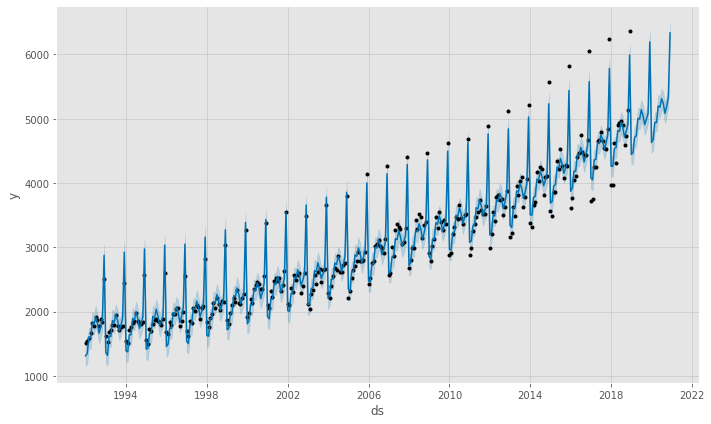

In [99]:
#Plotting data
m.plot(forecast);

(250.0, 350.0)

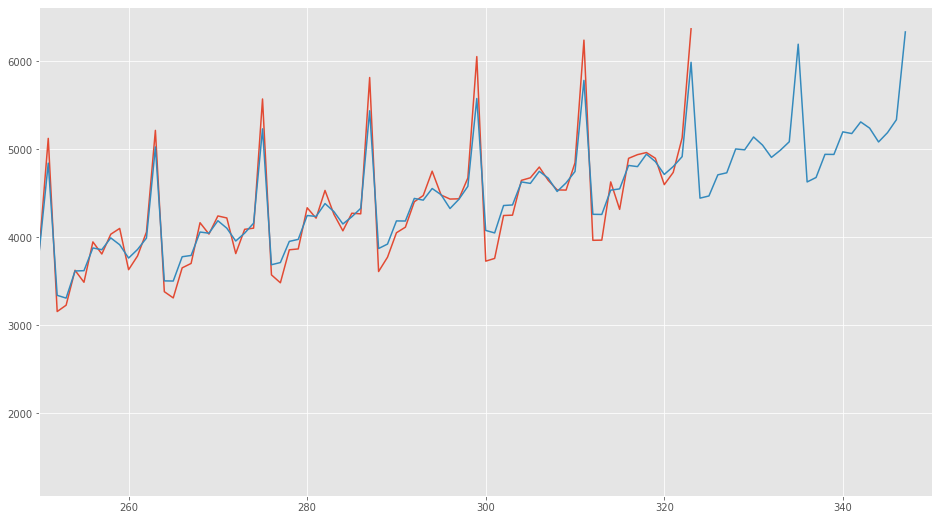

In [97]:
#Plotting data
plt.style.use('ggplot')
data['y'].plot(figsize = (16,9));
forecast['yhat'].plot(figsize = (16,9));
plt.xlim(250,350)

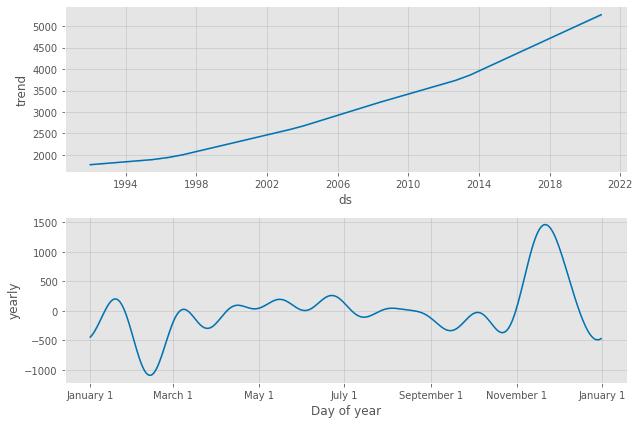

In [98]:
#Extracting components of the forecast
m.plot_components(forecast);